#### Compare Stimulus and Spontaneous dF/F

To get the graph in figure, you will need a full copy of data(We stat all data points' cells.)

The script below will show dF/F of the example location, you can run this with example data.

In [1]:
#%%
from Cell_Class.Format_Cell import Cell
import OS_Tools_Kit as ot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import cv2
from sklearn.model_selection import cross_val_score
from sklearn import svm
from scipy.stats import pearsonr
import scipy.stats as stats
from Cell_Class.Plot_Tools import Plot_3D_With_Labels
import copy
from Cell_Class.Advanced_Tools import *
from Classifier_Analyzer import *
from Cell_Class.Timecourse_Analyzer import *
from Filters import Signal_Filter_v2
import warnings
warnings.filterwarnings("ignore")

wp = r'D:\_All_Spon_Data_V1\L76_18M_220902'
ac = ot.Load_Variable_v2(wp,'Cell_Class.pkl')
c_spon = ot.Load_Variable(wp,'Spon_Before.pkl')

___
Step1, calculate stim vs spon response. Here we use Orientation stimulus onset as stim ON

In [2]:
cloc_name = 'L76_18M_220902'
ac_strength = pd.DataFrame(columns = ['Loc','Cell','In_Run','dFF'])
stim_spon_ratio = pd.DataFrame(columns = ['Loc','Cell','Ratio'])

spon_start = c_spon.index[0]
spon_end = c_spon.index[-1]
spon_dff_frame = ac.Get_dFF_Frames(runname = '1-001',start = spon_start,stop = spon_end)
stim_dff_frame = ac.Get_dFF_Frames(runname = ac.orienrun)

# and we select stim ON times only.
stim_id_train = np.array(ac.Stim_Frame_Align[f'Run{ac.orienrun[2:]}']['Original_Stim_Train'])
stimon_dff_ids = np.where(stim_id_train>0)[0]
stimon_dff_frame = stim_dff_frame[stimon_dff_ids,:]

# and calculate average response.
spon_dff_avr = spon_dff_frame.mean(0)
stimon_dff_avr = stimon_dff_frame.mean(0)
all_ratios = (spon_dff_avr/stimon_dff_avr)
for j in range(len(ac.acn)):
    ac_strength.loc[len(ac_strength),:] = [cloc_name,j+1,'Spontaneous',spon_dff_avr[j]]
    ac_strength.loc[len(ac_strength),:] = [cloc_name,j+1,'Stimulus_ON',stimon_dff_avr[j]]
    stim_spon_ratio.loc[len(stim_spon_ratio)] = [cloc_name,j+1,all_ratios[j]]


Fig 1N, Plot Each cell's Stimulus and Spontaneous dF/F Comaration

[Text(0.0, 0, '0'),
 Text(0.5, 0, '0.5'),
 Text(1.0, 0, '1'),
 Text(1.5, 0, '1.5'),
 Text(2.0, 0, '2')]

<Figure size 640x480 with 0 Axes>

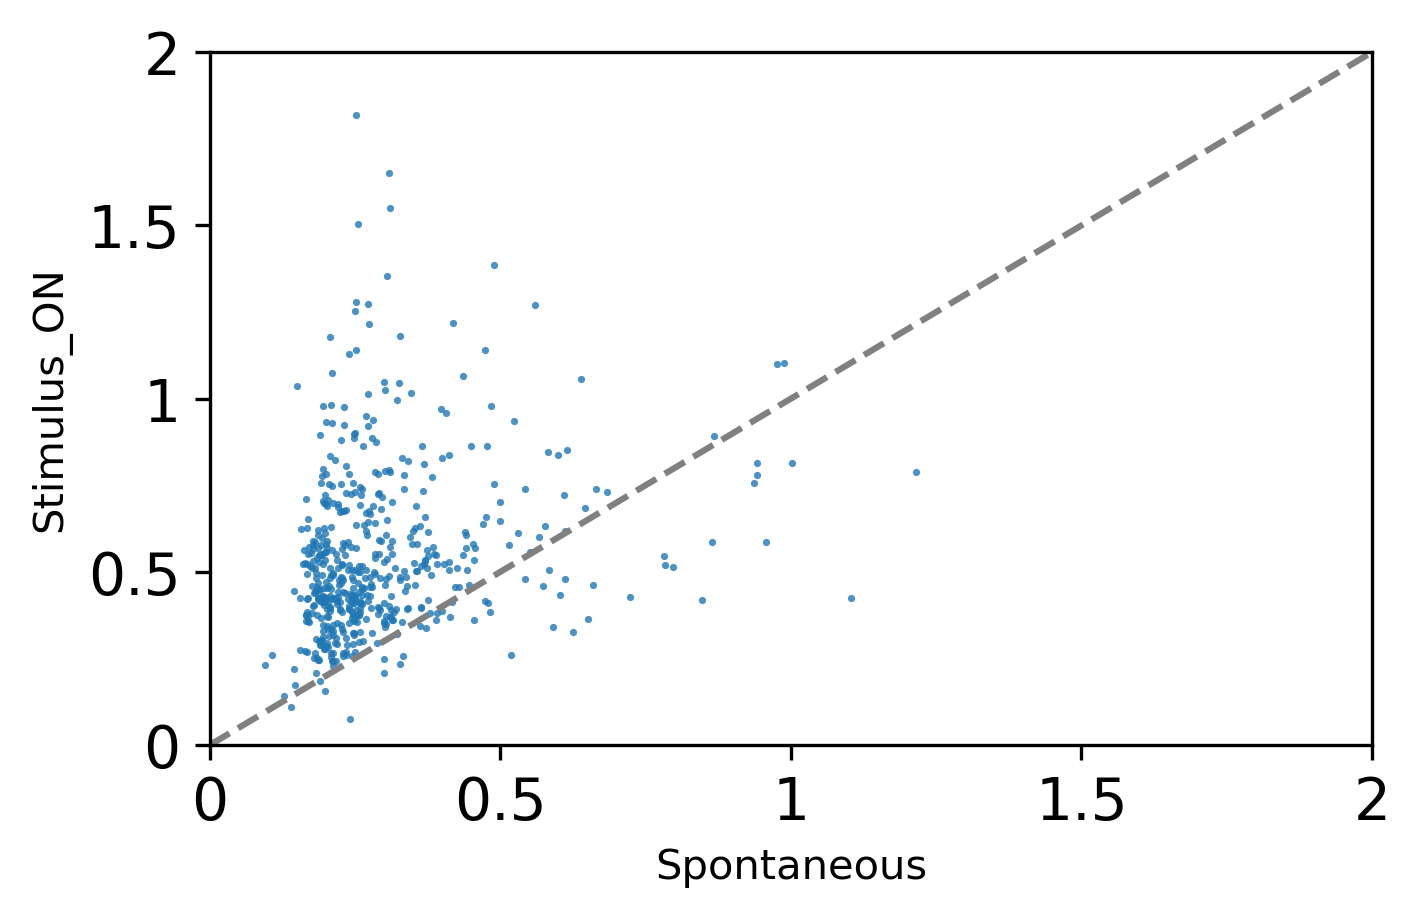

In [5]:
plotable_data = ac_strength
plt.clf()
fontsize = 14

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3),dpi = 300,sharex= False)
fig.subplots_adjust(hspace=0.4)

pivoted_df = plotable_data.pivot(index=['Loc', 'Cell'], columns='In_Run', values=['dFF'])
pivoted_df = pivoted_df['dFF']
ax.plot([0,2],[0,2],color = 'gray', linestyle = '--')
scatter = sns.scatterplot(data=pivoted_df,x = 'Spontaneous',y = 'Stimulus_ON',s = 3,ax = ax,linewidth = 0,alpha = 0.8,legend=False)
ax.set_xlim(0,2)
ax.set_ylim(0,2)

ax.set_yticks([0,0.5,1,1.5,2])
ax.set_yticklabels([0,0.5,1,1.5,2],fontsize = fontsize)
ax.set_xticks([0,0.5,1,1.5,2])
ax.set_xticklabels([0,0.5,1,1.5,2],fontsize = fontsize)

Fig 1O, histogram of all cells' spontaneous and stimulus response.

[Text(0.0, 0, '0'),
 Text(0.5, 0, '0.5'),
 Text(1.0, 0, '1'),
 Text(1.5, 0, '1.5'),
 Text(2.0, 0, '2')]

<Figure size 640x480 with 0 Axes>

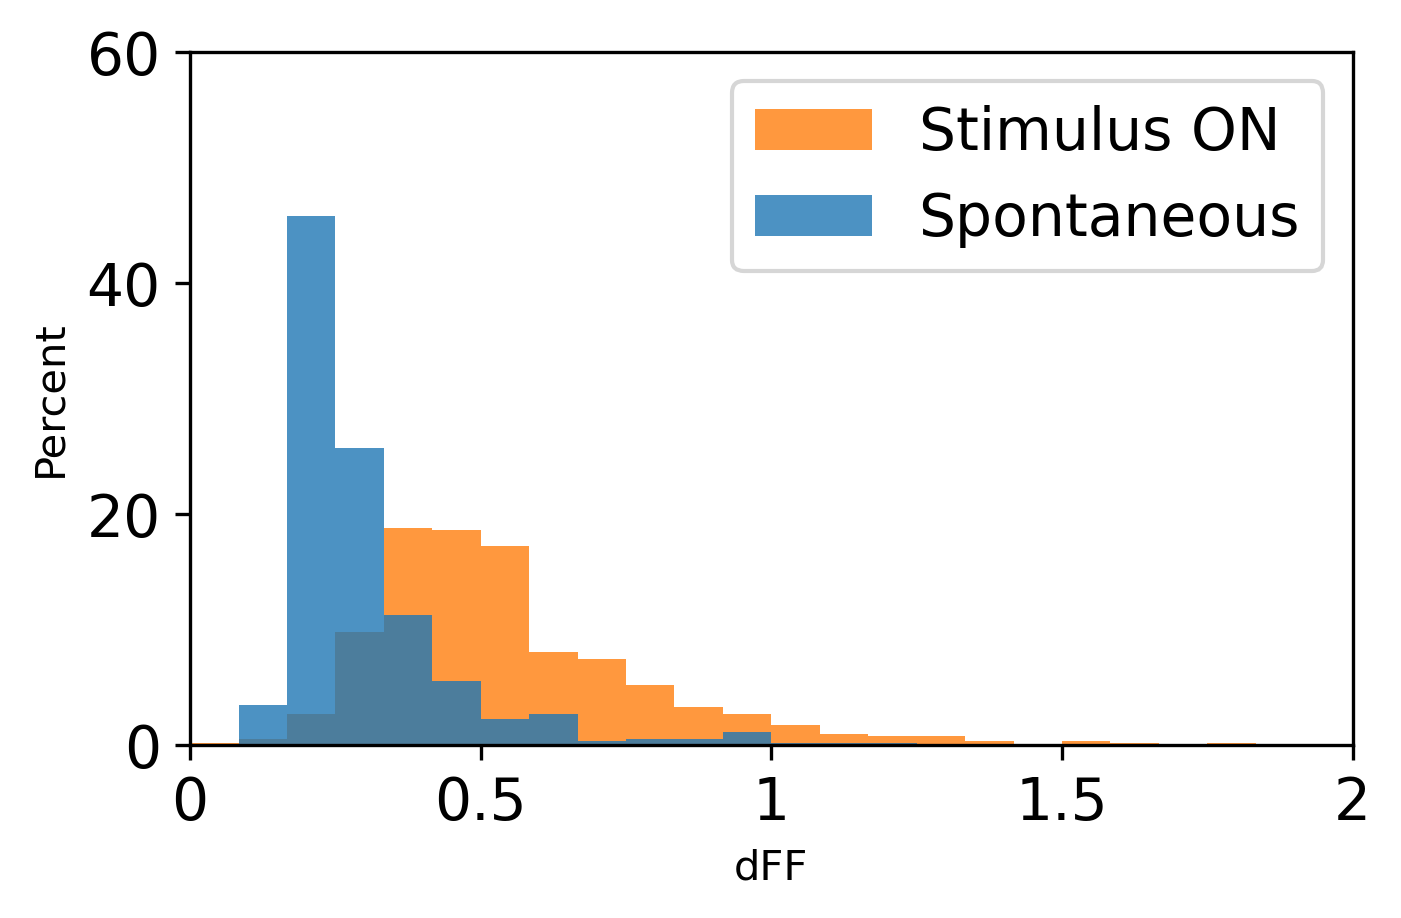

In [6]:
plotable_data = ac_strength
plt.clf()
fontsize = 14
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3),dpi = 300,sharex= False)
fig.subplots_adjust(hspace=0.4)


hists = sns.histplot(plotable_data,x = 'dFF',ax = ax,hue = 'In_Run', stat='percent',bins = np.linspace(0,2,25),alpha = 0.8,common_norm=False,edgecolor='none')
ax.set_xlim(0,2)
ax.legend(['Stimulus ON', 'Spontaneous'],prop = { "size": 14 })

ax.set_yticks([0,20,40,60])
ax.set_yticklabels([0,20,40,60],fontsize = fontsize)
ax.set_xticks([0,0.5,1,1.5,2])
ax.set_xticklabels([0,0.5,1,1.5,2],fontsize = fontsize)